## Preface

In the past few months, I’ve been learning machine learning via the [IBM Data Science specialization](https://www.coursera.org/professional-certificates/ibm-data-science) on Coursera. It’s been an exciting experience, having learned about many topics I’ve never dabbled in before. I could glide through most of the courses in the specialization because I am a software engineer with over a decade of experience. This meant that, for me, the real learning started in the last few courses. Learning some rudimentary machine learning has been exciting, so I decided to document what I know and how I understand things.

Therefore, a fair warning: I am an absolute machine learning newbie. I am writing this primarily for myself and someone in a similar boat. There might be some stuff that’s wrong here. If you see any, **please** let me know, so I can fix my understanding.
 
One of the first classification algorithms I learned was k-Nearest Neighbors (k-NN). When I discovered it, I found it really cool because it can do some legit classification while being an algorithm that fits within 100 lines of code. As an ML newbie, I find this fascinating. With the newfound excitement from learning k-NN, I decided to look deeper into it, find a dataset, do some feature engineering, apply k-NN, and assess its performance.

Before we dive into the dataset, I want to discuss the theory of the k-Nearest Neighbors (k-NN) algorithm and its inner workings.

## k-Nearest Neighbors

Let's take an imaginary dataset with cars, with three columns where two are features (top speed and horsepower) and the target (class):

In [71]:
import pandas as pd

data = {
    'Top Speed (mph)': [205, 217, 211, 186, 202, 187, 183, 174, 181, 155, 155, 150, 149, 147, 155, 126, 130, 122, 90, 95, 110, 112, 109, 118, 121, 130],
    'Horsepower (hp)': [600, 710, 650, 460, 500, 493, 420, 365, 414, 227, 255, 240, 335, 290, 330, 240, 260, 210, 150, 170, 200, 180, 190, 170, 220, 190],
    'Class': ['Hypercar', 'Hypercar', 'Hypercar', 'Supercar', 'Supercar', 'Supercar', 'Supercar', 'Supercar', 'Supercar', 'Luxury car', 'Luxury car', 'Luxury car', 'Luxury car', 'Luxury car', 'Luxury car', 'Economy car', 'Economy car', 'Economy car', 'Economy car', 'Economy car', 'Economy car', 'Economy car', 'Economy car', 'Economy car', 'Economy car', 'Economy car']
}

cars_df = pd.DataFrame(data)
cars_df

,Top Speed (mph),Horsepower (hp),Class
0,205,600,Hypercar
1,217,710,Hypercar
2,211,650,Hypercar
3,186,460,Supercar
4,202,500,Supercar
5,187,493,Supercar
6,183,420,Supercar
7,174,365,Supercar
8,181,414,Supercar
9,155,227,Luxury car


We can observe that the speed and horsepower affect the class of the car. If we create a scatterplot of the data we'll see how they're grouped on the plot:

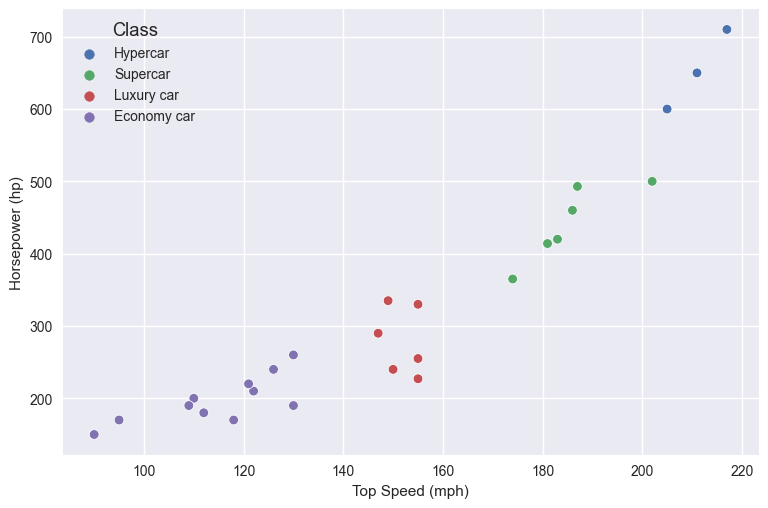

In [459]:
import seaborn as sns

sns.scatterplot(x=cars_df['Top Speed (mph)'], y=cars_df['Horsepower (hp)'], hue=cars_df['Class']);

There's a correlation between the top speed, the horsepower, and the class of the car. Now, if we get a car whose top speed is 140mph, with 300hp, would that be an economy or luxury car? This is where k-NN can help.

The k-NN algorithm is a voting system where the majority class label determines the class label of a new data point among its nearest 'k' neighbors, where k is an integer in the feature space. Using the above example of a car with a top speed of 140mph and 300hp, k-NN would measure the distance of the newly added point to its nearest neighbors. Once the algorithm finds the K closest points, it takes the prevalent category amongst those nearest points and set it to the newly added point. When setting K, a good starting point is usually the square root of the features used from the dataset. Generally, it's best if the K number is assigned to an odd number, so the algorithm doesn't run into a tie.

Now, you will see that I refer to k-NN as an algorithm and not an ML model. That's because k-NN is a non-parametric and lazy learning algorithm. In machine learning, lazy learning is a method in which the generalization of the training data is delayed until a query is made to the system. As we will see soon, there's no model that we will train with k-NN - it's merely an algorithm that will run on the training data and apply a local function (distance between points) to determine the target class.

### The math behind k-NN

The distance is the next important aspect: what is actually a distance between two points, or a vector, and other points/vectors? To calculate the distance between points we use what's called an Euclidean distance. If `a` and `b` are points on a two-dimensional plane, their Euclidean distance will be:

$$
d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2}
$$

For those that do not like mathematial notation, this basically means the square root of the squares of the differences between the two points on the plane. In Python, this would be:

```python
def euclidean_distance(a,b):
    # Two points, with their x and y coordinates
    a = [1,2]
    b = [3,4]

    # Calculate the squared distance
    squared_distance = (a[0] - b[0])**2 + (a[1] - b[1])**2

    # Return the root of the squared distance
    return math.sqrt(squared_distance)
```

When I read this the first time, I thought "why are we squaring the differences in the points if we're applying the square root later?". The reason is that by applying the square and then the square root them it's like taking the absolute value of each point - in other words, we gracefully handle negative points, so the distance is always a positive number (a negative distance is not really a thing).

And that's all the math that k-NN requires. Let's go back to a real dataset and apply k-NN to it.

## Patients' data & diabetes outcome

The dataset I found is [the Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) from Kaggle. It contains fetures regarding the patient's health status, with the diabetes outcome as the dependent variable. The goal is to implement our own k-NN classifier and then use it on the dataset to predict diabetes outcomes in patients. Afterwards, we will evaluate the classifier's performance relative to the one that's shipped with scikit-learn.

First, we will load the data, explore it, do a bit of feature engineering, and then we'll move on to building the solution.

In [478]:
df = pd.read_csv('diabetes.csv')

First, we will load the dataset and check its first columns just to get a feel for it:

In [479]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataset has different columns, each one of them with continious numerical values. Let's see their types and `null` counts:

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The fact that every column has no null values is great. We can also see that each column contains numerical values, where two are `float64` and the rest are `int64`.

Let's look at the column statistics:

In [481]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Cleaning zero values

There are a few interesting bits in the table above:

* we see patients whose `Glucose` measurements are zero, which makes no sense and we need to take care of
* we can also observe patients whose `BloodPressure` measurement is zero
* we can also observe patients whose `SkinThickness` measurement is zero
* we can also observe patients whose `Insulin` measurement is zero
* we can also observe patients whose `BMI` is also zero, which is plainly impossible

Let's clean up these nonsensical values - we can replace the zeroes with the mean of each column:

In [482]:
means = df.iloc[:, 1:6].mean()
means

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [483]:
nonzeros = list(df.columns[1:6])
for column in nonzeros:
    df[column] = df[column].replace(0, means[column])

We can see how the `min` values now changed:

In [484]:
df.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

Now that we cleaned up the zero values, let's look splitting our data into training and tests sets.

## Data splitting

Splitting the data into test and train data is an essential part of model buildling. Having the training data allows us to train our model, while the test data allows us to check the accuracy of the model. In other words, the test data allows us to see how our model will perform with out-of-sample data.

Out-of-sample data is a fancy way of saying data that is not part of the training dataset.

To split our data into training and test data, we can use `scikit-learn`'s `train_test_split` method.

In [485]:
X = df.iloc[:, 0:7].to_numpy()
y = df.iloc[:, 8].to_numpy()

In [486]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

The `train_test_split` method takes three immportant arguments:

* the independent features, stored in the variable `X`
* the target values, stored in the variable `y`
* the test size as a float, which tells the method how big the test size should be

Let's see how `train_test_split` has split our data here. Remember, the original dataset had 768 rows and 9 columns:

In [487]:
df.shape

(768, 9)

Let's see the `shape` of the train and test data:

In [488]:
X_train.shape

(460, 7)

In [489]:
X_test.shape

(308, 7)

We can see that the data has been split to 60% training data and 40% test data, which is exactly what the `test_size` arguent instructed `train_test_split` to do (with its value 0.4).

Now that our data is split, let's look into the problem of data scaling.

## Scaling our data

As we already established in the short part on the backing theory, k-NN is an algorithm that calculates distances between points on a plane. Because it calculates distances, the algorithm will be sensitive to the larger range in which some of the features may have.

Let's look at the different ranges of each feature in the dataset:

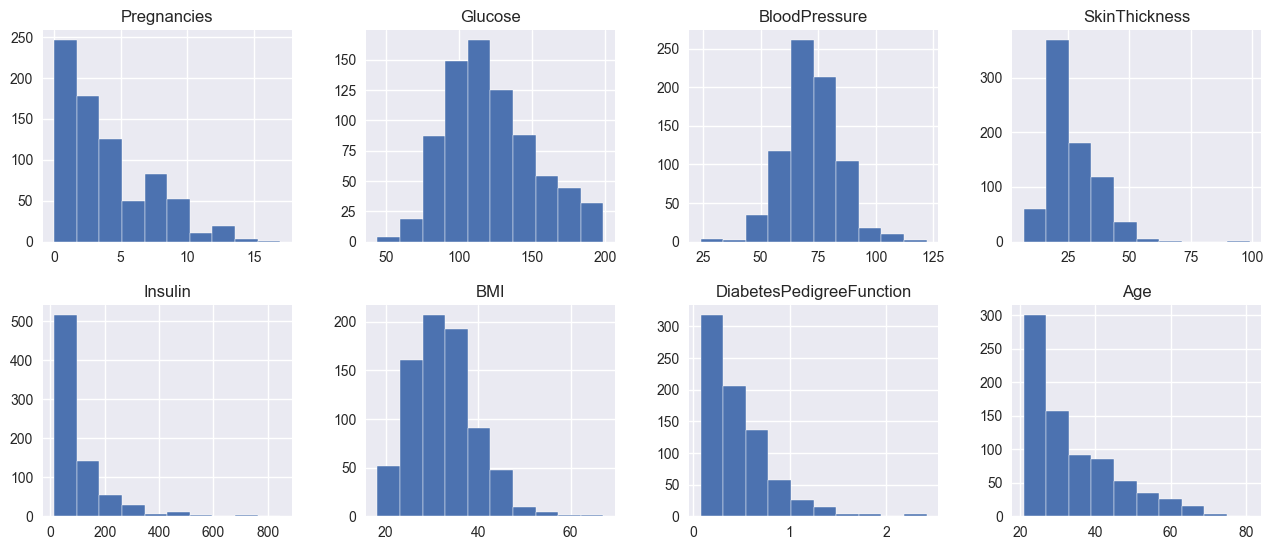

In [490]:
plt.style.use('seaborn-v0_8')

fig, axes = plt.subplots(2, 4, figsize=[14,6])

pd.DataFrame.hist(df.drop('Outcome', axis=1), ax=axes);

For example, let's take two 2D planes, where the frist one has `Pregnancies` as one axis and `SkinThickness` as the other, and the second plane has `Insulin` and `Glucose` as axes. Due to the ranges of the axes in the first plane being smaller than the second plane, k-NN will always give the distances of the second plane more significance. In other words, the values of the distances from the second plane will always have a higher absolute value, which will make k-NN bias towards the distances from the second plane.

To remove this kind of bias, we need to scale our features.


### Intro to scaling

There are different ways to scale features, but I'd say exploring them is outside of the scope of this writeup. One has got to draw the line somewhere! To scale our features we will use the `preprocessing` module from `sklearn`. From the `preprocessing` module we will use the `StandardScaler` class - it's a utility class, which is a quick and easy way to perform standardization on an array-like dataset.

Let's try to standardize all of our features and see their before- and after-standardization:

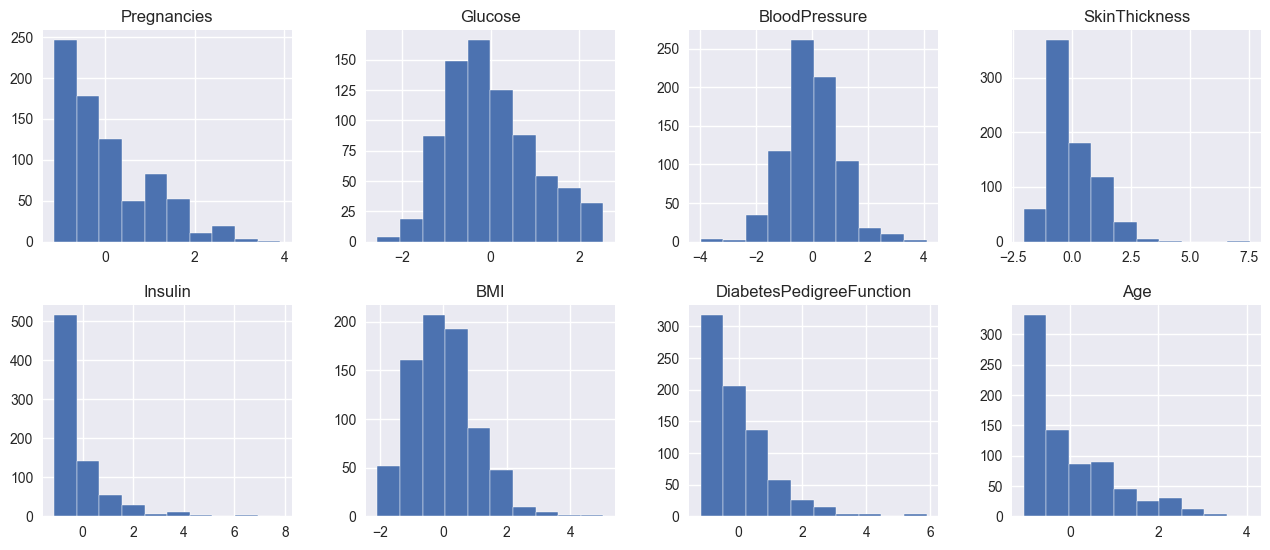

In [491]:
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(2, 4, figsize=[14,6])

scaler = StandardScaler()
features = df.iloc[:, 0:8]
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=df.columns[0:8])
scaled_features_df.hist(ax=ax);

What's interesting is that the histograms of the featuers before and after scaling look the same. This is exactly what we want - the scaled individual features are still distributed identically as before scaling, but all values are scaled down between -4 and 4, with some outliers. By standardizing the features here we make sure that some features won't have a greater effect on the model than others, due to their absolute values being larger than others.

### Scaling the features

To actually scale our training and test sets, we need to take similar steps as above. First, let's initialize the scaler with the `X_train` data, and make it fit and transform the `X_train` data first:

In [492]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

Now, with the scaler fitted to the `X_train` data, we need to transform the `X_test` data:

In [493]:
X_test = scaler.transform(X_test)

Now that the features are scaled, let's use them in our k-Nearest Neighbors algorithm. Which we'll have to first write from scratch before we try it out.

## k-NN from scratch

Now that we have that out of the way, let's implement our own k-NN. To implement the algorithm, we need two methods:

* `fit`, which will set the features (X) and labels (y) to the model's memory
* `predict`, which will take a vector of out-of-sample data and return a prediction

Let's start with the simpler ones:

In [402]:
class KNN:
  def __init__(self, k=5):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

In this case, fitting the X and y just means setting them as the object's attributes. 

Let's look at the `predict` method:

In [531]:
def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    k_indices = np.argsort(distances)[:self.k]
    k_labels = [self.y_train[i] for i in k_indices]

    most_common = Counter(k_labels).most_common()
    return most_common[0][0]

The `predict` method essentially loops through each of the observations from the X n-dimensional array and calls `_predit` for every subarray. Within `_predict` we calculate the Euclidean distances for every array pair: the argument (`X`) and each array of the training data (`X_train`). Once we have the distances, we use `np.argsort` [[docs](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)] to get the indices of the sorted distances. `np.argsort` will basically perform a sort on the distances, but return the indices of the elements in the sorted array, instead of the array itself.

Using the indices we will take the matching target variables from the `y_train` - in other words, by having the indices of the closest distances from the `X_train` set we will use their matching target labels from `y_train`. This is how the `X_train` input features become a single target class - by fetching the corresponding `y_train` label.

Once we have the `k_labels`, we just find the most common label of the bunch. This is the voting component of the k-NN algorithm. By finding the most common label we basically say: from the K nearest neighbors, the most common is Z, so we return Z as the predicted class.

Here's the whole k-NN algorithm:

In [530]:
from collections import Counter

def euclidean_distance(a, b):
  return np.sqrt(np.sum((a-b)**2))

class KNN:
  def __init__(self, k=5):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
    
  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return np.array(predictions)

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    k_indices = np.argsort(distances)[:self.k]
    k_labels = [self.y_train[i] for i in k_indices]

    most_common = Counter(k_labels).most_common()
    return most_common[0][0]

Let's put it into use, using the `X_train_scaled` and `X_test_scaled`:

In [495]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

Now we have our predictions from the k-NN algorithm, but how do we know how if our model is accurate? This is where we need to evaluate our model's performance.

## Accuracy, confusion, precision & recall

Model evaluation is a really interesting topic - it's basically measuring how accurate the model is against the test data. We will look at a few different techniques here that I'd like to explore, but the list is not exhaustive as there are other methods of model evaluation as well. 

To evaluate the performance of the algorithm we will look at the accuracy metric and the confusion matrix of the algorithm.

### Accuracy

Accuracy is the simplest approach of all. The way it works is by finding the number of correct predictions between the predictions and the targets, divided by the number of all targets. The accuracy measurement essentially finds the ratio of correctly predicted labels against all labels.

In Python, the accuracy method would look like:

In [518]:
def calculate_accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

If we take our `predictions` from above and run them against our test labels (`y_test`), we will get the accuracy of the k-NN algorithm against the test data:

In [519]:
calculate_accuracy(y_test, predictions)

0.7045454545454546

The accuracy is quite a simple measurement, as it doesn't tell us about the potential misclassifications. In the diabetes example, with accuracy of 0.75 it means that we will end up misdiagnosing a quarter of the patients.

### Confusion matrix

While the accuracy metric speaks loads, for us humans in some cases a visualization goes a longer way instead of a metric. A confusion matrix is a visualization that can give us a better idea of the algorithm's performance. Let's see the confusion matrix of our k-NN algorithm:

In [498]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

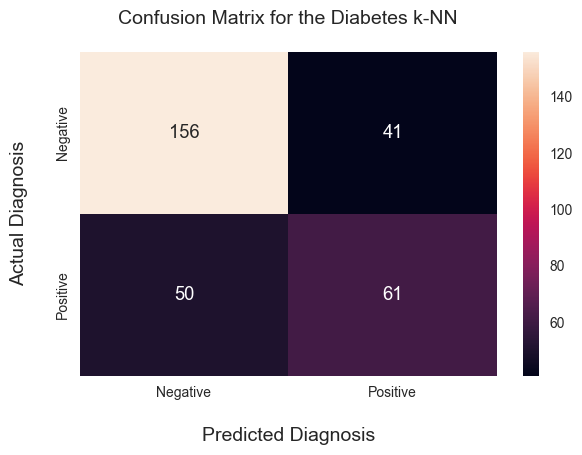

In [499]:
import seaborn as sns

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(6, 4))

ax = sns.heatmap(cm, annot=True, fmt='d')

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Diabetes k-NN", fontsize=14, pad=20);

We can see in the confusion matrix that the algorithm predicts the Negative outcomes pretty well, but there is a significant misclassification happening in the lower left quadrant. In other words, the algorithm classified 56 patients as 'Negative' (no diabetes), but the diagnosis was 'Positive' (they did get diabetes). These 56 classifications are also called false negatives.

What's tricky about this stark number of false negatives is that if a doctor followed the algorithm's prediction, the correct diagnosis would be set much later with these patients, which can have long-term implications for their health. So what can we do about this? Is this a problem with our algorithm or our setup? Or a bit of both?

Let's look at another few metrics to measure the algorithm's performance: precision, recall & F1 score.

### Precision & recall

These two are exciting metrics because they measure the positive predictive value and the algorithm's sensitivity, respectively. Another way to explain them:

* Precision is the true positive predictions over the sum of the true positive and false positive predictions. It basically returns the ratio of true positive predictions over all positive predictions. Hence the name 'positive predictive value.'
* Recall, on the other hand, is the true positive predictions over the sum of the true predictions and the false negative. The true positive and false negative predictions are, in fact, all the _correct_ predictions. So recall returns the ratio of the true predictions against the _correct_ predictions. Hence the name 'sensitivity' - it measures how many of the correct predictions the algorithm under evaluation will pick up.

We can implement precision and recall using Python. But, first, we need to implement four helper functions:

* `true_positive`
* `true_negative`
* `false_positive`
* `false_negative`

From there, we can easily implement `recall` and `precision`. So let's give it a shot. First, the helpers:

In [500]:
def true_positive(y_val, y_pred):
    tp = 0
    for pred, val in zip(y_pred, y_val):
        if pred == 1 and val == 1:
            tp += 1
    return tp

def true_negative(y_val, y_pred):
    tn = 0
    for pred, val in zip(y_pred, y_val):
        if pred == 0 and val == 0:
            tn += 1
    return tn

def false_positive(y_val, y_pred):
    fp = 0
    for pred, val in zip(y_pred, y_val):
        if pred == 1 and val == 0:
            fp += 1
    return fp

def false_negative(y_val, y_pred):
    fn = 0
    for pred, val in zip(y_pred, y_val):
        if pred == 0 and val == 1:
            fn += 1
    return fn

Next, the methods themselves:

In [520]:
def calculate_precision(y_val, y_pred):
    tp = true_positive(y_val, y_pred)
    fp = false_positive(y_val, y_pred)
    prec = tp / (tp+fp)
    return prec

def calculate_recall(y_val, y_pred):
    tp = true_positive(y_val, y_pred)
    fn = false_negative(y_val, y_pred)
    rec = tp / (tp + fn)
    return rec

Let's measure the `precision` and `recall` of the predictions:

In [521]:
precision_scr = calculate_precision(y_test, predictions)
recall_scr = calculate_recall(y_test, predictions)
print(f"Precision: {precision_scr}")
print(f"Recall: {recall_scr}")

Precision: 0.5980392156862745
Recall: 0.5495495495495496


Let's compare our implementation of precision and recall against the one from scikit-learn:

In [522]:
from sklearn.metrics import precision_score, recall_score

print(f"scikit-learn's Precision: {precision_score(y_test, predictions)}")
print(f"scikit-learn's Recall: {recall_score(y_test, predictions)}")

scikit-learn's Precision: 0.5980392156862745
scikit-learn's Recall: 0.5495495495495496


Nice, we got the same scores. You can see that our precision and recall scores are pretty low (0 is worst, 1 is best). This means that with our feature setup and the algorithm we chose, k Nearest Neighbors is not the best choice for the problem. We can conclude that because the algorithm's ability not to label negative samples as positive (precision) and its ability to find all the positive samples (recall) are quite low.

Now that we have the precision and recall, to wrap up our assessment of the algorithm we can also apply the F1 score.

### F1 Score

The F1 score measures the model’s balanced ability to capture positive cases (recall) **and** be accurate with the cases it does capture (precision). Mathematically explained, it takes the recall and precision metrics and it calculates their harmonic mean:

```
F1 = 2 * (precision * recall) / (precision + recall)
```

When compared to the accuracy score, the F1 score is useful because it has both recall and precision captured into it. For contrast, the accuracy score only looks at the recall, ignoring the precision. This bi-modal nature of the F1 score makes it a popular choice of evaluation metric in the ML community.

As you can see above the formula is quite simple, but let's implement it for ourselves and test it against our precision and recall metrics:

In [523]:
def calculate_f1(precision, recall):
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [534]:
f1_scr = calculate_f1(precision_scr, recall_scr)
f1_scr

0.5727699530516432

Now, 0.59259 doesn't tell us much as we need a good idea of how to interpret it. From what I was able to find online, the best way to interpret F1 is this table:


| F1 score | Interpretation |
|----------|----------------|
| > 0.9    | Very good      |
| 0.8 - 0.9 | Good           |
| 0.5 - 0.8 | OK             |
| < 0.5    | Not good       |


If we'd follow the above table, then our k-NN algorithm is doing barely OK. Which means we should probably look into other algorithms or models to predict diabetes in patients using the available dataset.

## Comparing to scikit-learn

Out of curiosity, the last thing that I wanted to look at is to compare our implementation of k-NN with the one from scikit-learn. The comparison will only confirm whether our implementation is correct, assuming we get the same metrics. Surely, the scikit-learn implementation is better as it will perform better with larger datasets. Still, for our 700-observations-large dataset both will do the trick.

Back to the comparison:

In [527]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

/Users/ie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Now that we have the predictions of the `KNeighborsClassifier`, let's see the precision, recall and F1 scores:

In [529]:
sk_precision = calculate_precision(y_test, predictions)
sk_recall = calculate_recall(y_test, predictions)
sk_f1_score = calculate_f1(precision, recall)

print(f"Precision: {sk_precision}")
print(f"Recall: {sk_recall}")
print(f"F1: {sk_f1_score}")

Precision: 0.5980392156862745
Recall: 0.5495495495495496
F1: 0.5727699530516432


Let's compare them to our scores:

In [535]:
print(f"Precision same? {sk_precision == precision_scr}")
print(f"Recall same? {sk_recall == recall_scr}")
print(f"F1 same? {sk_f1_score == f1_scr}")

Precision same? True
Recall same? True
F1 same? True


Voilà! Our k-NN implementation has the same recall and precision metrics as the one from sklearn. That's pretty cool to see, as it confirms that we have implemented our k-NN well!

-------

Some references I used while writing this post:

* https://www.kaggle.com/code/ajinkyaabhang/implementing-acc-precision-recall-f1-from-scratch
* https://www.kaggle.com/discussions/questions-and-answers/350350
* https://en.wikipedia.org/wiki/Instance-based_learning
* https://en.wikipedia.org/wiki/Lazy_learning
* https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/
* https://en.wikipedia.org/wiki/Precision_and_recall
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* https://stephenallwright.com/interpret-f1-score/ 